## Página 175

Projeto X: Período de Payback = 3.20 anos, VPL = 28.24, TIR = 16.99%


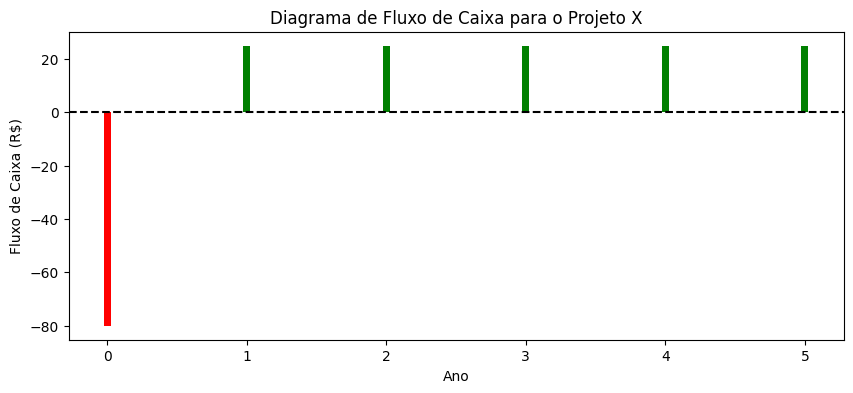

Projeto Y: Período de Payback = 4.00 anos, VPL = 9.88, TIR = 7.93%


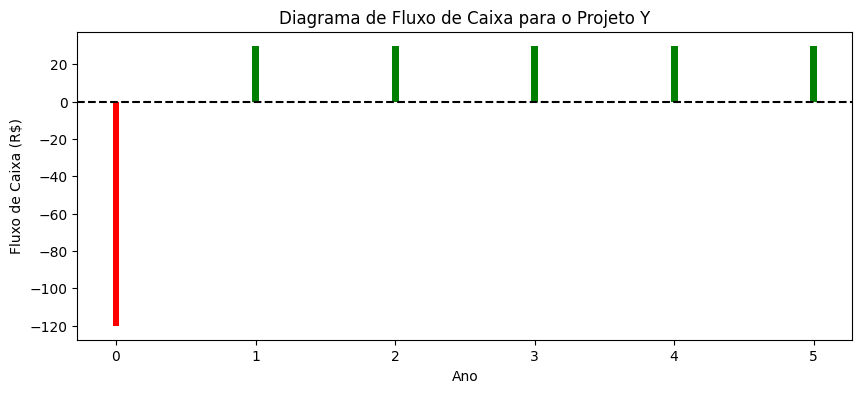

Projeto Z: Período de Payback = 4.29 anos, VPL = 1.53, TIR = 5.37%


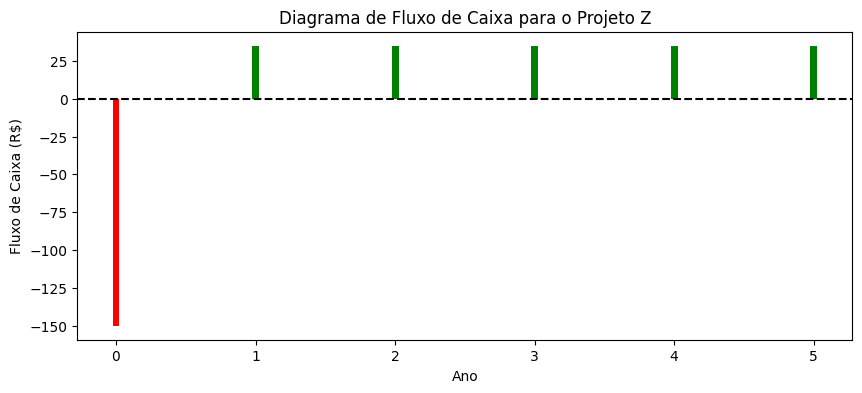

Projeto A: Período de Payback = 2.38 anos, VPL = 33.05, TIR = 18.13%


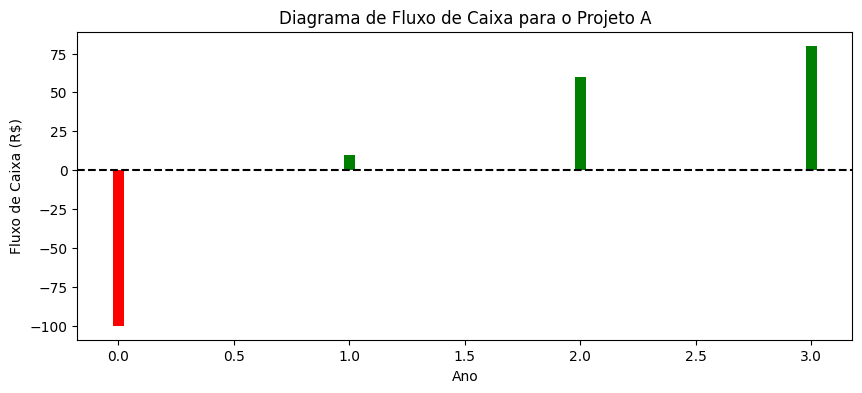

Projeto B: Período de Payback = 1.60 anos, VPL = 29.29, TIR = 23.56%


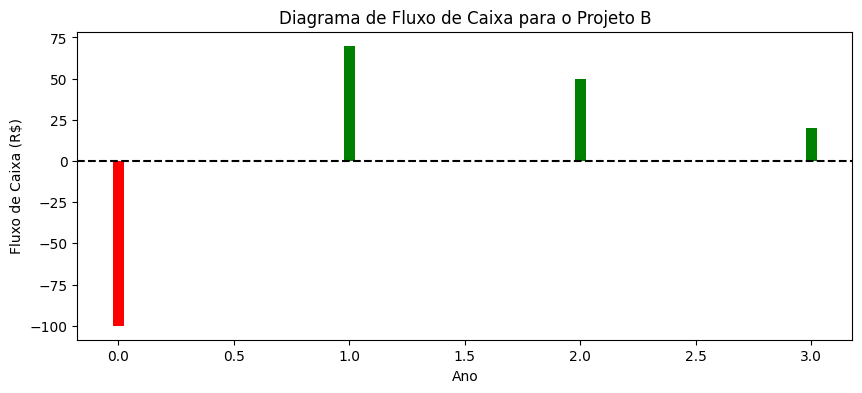

In [2]:
import pip
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf

def calcular_payback(investimento_inicial, fluxos_de_caixa):
    fluxo_caixa_acumulado = 0
    ano = 0
    
    # Loop através do fluxo de caixa de cada ano
    for fluxo_caixa in fluxos_de_caixa:
        fluxo_caixa_acumulado += fluxo_caixa
        ano += 1
        
        # Verifica se o fluxo de caixa acumulado é suficiente para cobrir o investimento inicial
        if fluxo_caixa_acumulado >= investimento_inicial:
            # Calcula a fração do ano necessária para atingir o equilíbrio
            restante = investimento_inicial - (fluxo_caixa_acumulado - fluxo_caixa)
            fracao = restante / fluxo_caixa
            periodo_payback = ano - 1 + fracao
            return periodo_payback
    
    # Se o período de payback não for atingido dentro dos fluxos de caixa fornecidos
    return None

def calcular_vpl(investimento_inicial, fluxos_de_caixa, taxa_desconto):
    vpl = -investimento_inicial
    for ano, fluxo_caixa in enumerate(fluxos_de_caixa, start=1):
        vpl += fluxo_caixa / ((1 + taxa_desconto) ** ano)
    return vpl

def calcular_tir(investimento_inicial, fluxos_de_caixa):
    todos_fluxos_caixa = [-investimento_inicial] + fluxos_de_caixa
    tir = npf.irr(todos_fluxos_caixa)
    return tir

def plotar_fluxos_de_caixa(nome_projeto, investimento_inicial, fluxos_de_caixa):
    anos = list(range(len(fluxos_de_caixa) + 1))
    valores_fluxos_caixa = [-investimento_inicial] + fluxos_de_caixa
    
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plotando os fluxos de caixa como barras
    fluxo_caixa_acumulado = np.cumsum(valores_fluxos_caixa)
    cores = ['red'] + ['green' if valor >= 0 else 'red' for valor in fluxos_de_caixa]
    
    for i in range(len(valores_fluxos_caixa)):
        ax.bar(anos[i], valores_fluxos_caixa[i], color=cores[i], width=0.05)
    
    # Adicionando linha horizontal em y=0
    ax.axhline(0, color='black', linestyle='--')
    
    plt.xlabel('Ano')
    plt.ylabel('Fluxo de Caixa (R$)')
    plt.title(f'Diagrama de Fluxo de Caixa para o Projeto {nome_projeto}')
    plt.show()

# Exemplo de uso para os projetos X, Y, Z, A e B
projetos = {
    'X': {'investimento_inicial': 80, 'fluxos_de_caixa': [25, 25, 25, 25, 25]},
    'Y': {'investimento_inicial': 120, 'fluxos_de_caixa': [30, 30, 30, 30, 30]},
    'Z': {'investimento_inicial': 150, 'fluxos_de_caixa': [35, 35, 35, 35, 35]},
    'A': {'investimento_inicial': 100, 'fluxos_de_caixa': [10, 60, 80]},
    'B': {'investimento_inicial': 100, 'fluxos_de_caixa': [70, 50, 20]},
}

taxa_desconto = 0.05

for projeto, dados in projetos.items():
    periodo_payback = calcular_payback(dados['investimento_inicial'], dados['fluxos_de_caixa'])
    vpl = calcular_vpl(dados['investimento_inicial'], dados['fluxos_de_caixa'], taxa_desconto)
    tir = calcular_tir(dados['investimento_inicial'], dados['fluxos_de_caixa'])
    
    if periodo_payback:
        print(f"Projeto {projeto}: Período de Payback = {periodo_payback:.2f} anos, VPL = {vpl:.2f}, TIR = {tir:.2%}")
    else:
        print(f"Projeto {projeto}: Período de payback não atingido com os fluxos de caixa fornecidos, VPL = {vpl:.2f}, TIR = {tir:.2%}")
    
    # Plotando os fluxos de caixa
    plotar_fluxos_de_caixa(projeto, dados['investimento_inicial'], dados['fluxos_de_caixa'])

## Página 177


Payback Descontado Projeto X
Ano  FC        FC VP          FC.ac VP       
0    -80       -80.00         -80.00         
1    25        23.81          -56.19         
2    25        22.68          -33.51         
3    25        21.60          -11.92         
4    25        20.57          8.65           
5    25        19.59          28.24          

Payback Descontado = 3.579 anos



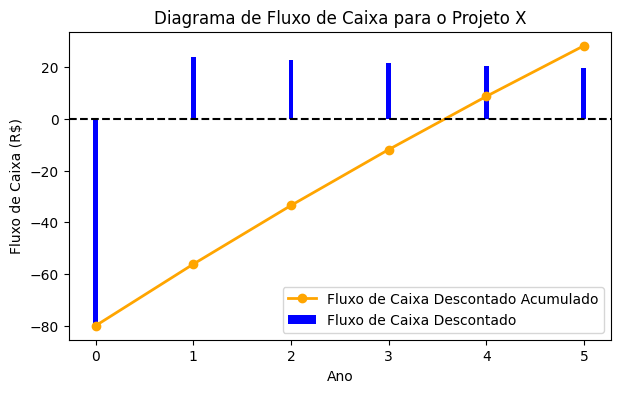


Payback Descontado Projeto Y
Ano  FC        FC VP          FC.ac VP       
0    -120      -120.00        -120.00        
1    30        28.57          -91.43         
2    30        27.21          -64.22         
3    30        25.92          -38.30         
4    30        24.68          -13.62         
5    30        23.51          9.88           

Payback Descontado = 4.579 anos



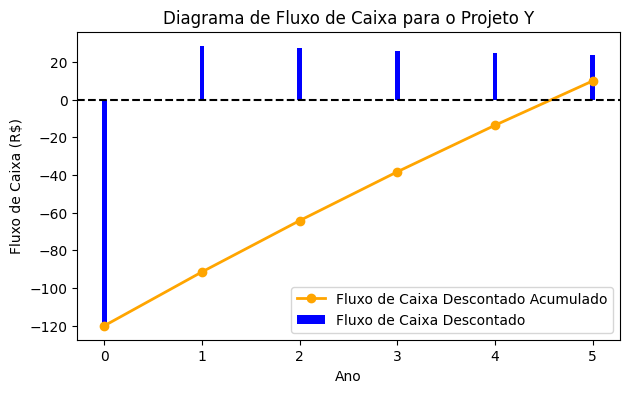


Payback Descontado Projeto Z
Ano  FC        FC VP          FC.ac VP       
0    -150      -150.00        -150.00        
1    35        33.33          -116.67        
2    35        31.75          -84.92         
3    35        30.23          -54.69         
4    35        28.79          -25.89         
5    35        27.42          1.53           

Payback Descontado = 4.944 anos



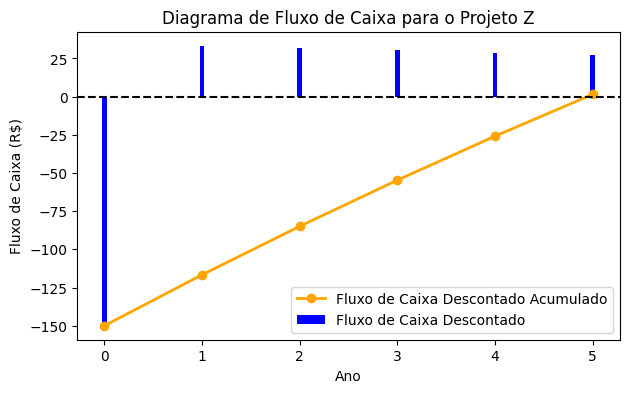


Payback Descontado Projeto A
Ano  FC        FC VP          FC.ac VP       
0    -100      -100.00        -100.00        
1    10        9.52           -90.48         
2    60        54.42          -36.05         
3    80        69.11          33.05          

Payback Descontado = 2.522 anos



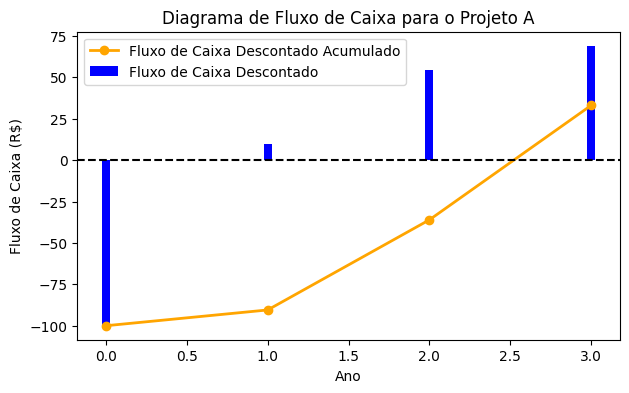


Payback Descontado Projeto B
Ano  FC        FC VP          FC.ac VP       
0    -100      -100.00        -100.00        
1    70        66.67          -33.33         
2    50        45.35          12.02          
3    20        17.28          29.29          

Payback Descontado = 1.735 anos



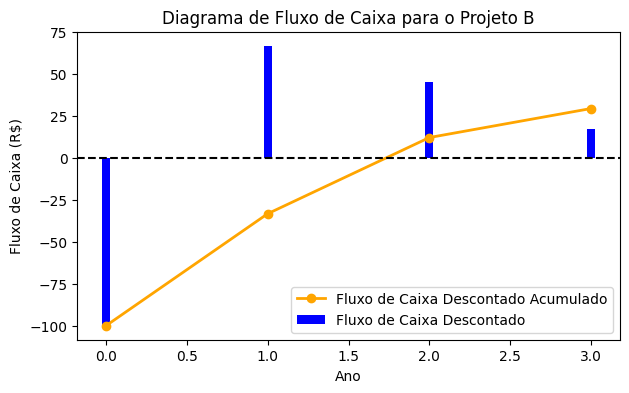

In [4]:
def calcular_payback_descontado(investimento_inicial, fluxos_de_caixa, taxa_desconto):
    fluxo_caixa_acumulado = -investimento_inicial
    for ano, fluxo_caixa in enumerate(fluxos_de_caixa, start=1):
        fluxo_caixa_descontado = fluxo_caixa / ((1 + taxa_desconto) ** ano)
        fluxo_caixa_acumulado += fluxo_caixa_descontado
        if fluxo_caixa_acumulado >= 0:
            return ano - 1 + (-fluxo_caixa_acumulado + fluxo_caixa_descontado) / fluxo_caixa_descontado
    return None

def plotar_fluxos_de_caixa(nome_projeto, investimento_inicial, fluxos_de_caixa, taxa_desconto):
    anos = list(range(len(fluxos_de_caixa) + 1))
    
    # Calculando fluxos de caixa descontados
    valores_fluxos_caixa_descontados = [-investimento_inicial]
    for ano, fluxo_caixa in enumerate(fluxos_de_caixa, start=1):
        fluxo_caixa_descontado = fluxo_caixa / ((1 + taxa_desconto) ** ano)
        valores_fluxos_caixa_descontados.append(fluxo_caixa_descontado)
    
    # Calculando o fluxo de caixa descontado acumulado
    fluxo_caixa_descontado_acumulado = np.cumsum(valores_fluxos_caixa_descontados)
    
    # Exibindo a tabela de resultados
    print(f"\nPayback Descontado Projeto {nome_projeto}")
    print(f"{'Ano':<5}{'FC':<10}{'FC VP':<15}{'FC.ac VP':<15}")
    for ano in range(len(anos)):
        fc = -investimento_inicial if ano == 0 else fluxos_de_caixa[ano - 1]
        fc_vp = valores_fluxos_caixa_descontados[ano]
        fc_ac_vp = fluxo_caixa_descontado_acumulado[ano]
        print(f"{ano:<5}{fc:<10}{fc_vp:<15.2f}{fc_ac_vp:<15.2f}")
    
    payback_descontado = calcular_payback_descontado(investimento_inicial, fluxos_de_caixa, taxa_desconto)
    if payback_descontado:
        print(f"\nPayback Descontado = {payback_descontado:.3f} anos\n")
    else:
        print(f"\nPayback Descontado não atingido com os fluxos de caixa fornecidos\n")
    
    # Plotando o fluxo de caixa descontado
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(anos, valores_fluxos_caixa_descontados, color='blue', width=0.05, label='Fluxo de Caixa Descontado')
    ax.plot(anos, fluxo_caixa_descontado_acumulado, color='orange', marker='o', linestyle='-', linewidth=2, label='Fluxo de Caixa Descontado Acumulado')
    ax.axhline(0, color='black', linestyle='--')
    ax.legend()
    plt.xlabel('Ano')
    plt.ylabel('Fluxo de Caixa (R$)')
    plt.title(f'Diagrama de Fluxo de Caixa para o Projeto {nome_projeto}')
    plt.show()

# Exemplo de uso para os projetos X, Y, Z, A e B
projetos = {
    'X': {'investimento_inicial': 80, 'fluxos_de_caixa': [25, 25, 25, 25, 25]},
    'Y': {'investimento_inicial': 120, 'fluxos_de_caixa': [30, 30, 30, 30, 30]},
    'Z': {'investimento_inicial': 150, 'fluxos_de_caixa': [35, 35, 35, 35, 35]},
    'A': {'investimento_inicial': 100, 'fluxos_de_caixa': [10, 60, 80]},
    'B': {'investimento_inicial': 100, 'fluxos_de_caixa': [70, 50, 20]},
}

taxa_desconto = 0.05

for projeto, dados in projetos.items():
    # Plotando os fluxos de caixa
    plotar_fluxos_de_caixa(projeto, dados['investimento_inicial'], dados['fluxos_de_caixa'], taxa_desconto)
